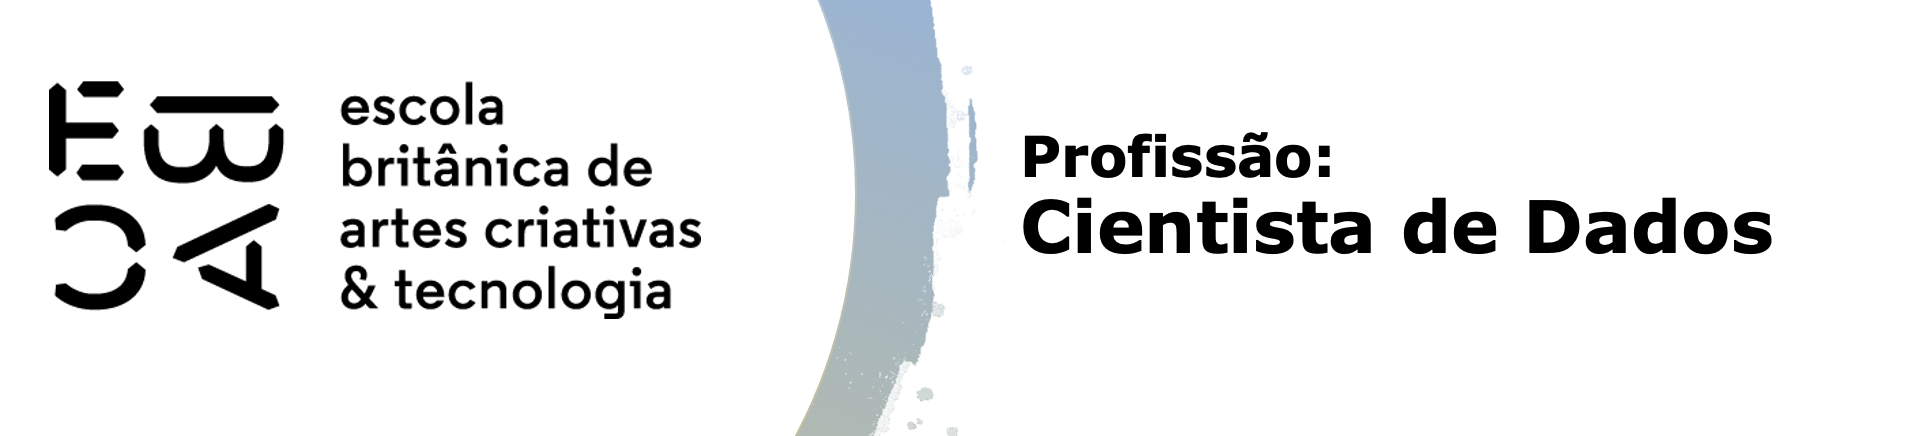

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , classification_report
from sklearn.model_selection import GridSearchCV

In [27]:
X_train = pd.read_csv(r'..\input\X_train.csv')
y_train = pd.read_csv(r'..\input\y_train.csv')
X_test = pd.read_csv(r'..\input\X_test.csv')
y_test = pd.read_csv(r'..\input\y_test.csv')

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [28]:
X_train1 = X_train[['tGravityAcc-min()-X' , 'fBodyAccJerk-bandsEnergy()-1,24' , 'tGravityAcc-mean()-Y']]
X_test1 = X_test[['tGravityAcc-min()-X' , 'fBodyAccJerk-bandsEnergy()-1,24' , 'tGravityAcc-mean()-Y']]

In [29]:
%%time
path = DecisionTreeClassifier(random_state= 21 , min_samples_leaf= 20).cost_complexity_pruning_path(X_train1 , y_train)
ccp_alphas , impurities = path.ccp_alphas , path.impurities

CPU times: total: 15.6 ms
Wall time: 22 ms


In [30]:
#Salvando apenas ccp_alphas maiores que 0
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [31]:
grid_parametros = {'ccp_alpha' : ccp_alphas[::10]}

In [32]:
clf = DecisionTreeClassifier(random_state= 21)

In [33]:
%%time
grid = GridSearchCV(estimator = clf ,param_grid = grid_parametros, cv = 10)
grid.fit(X_train1 , y_train)

CPU times: total: 1.7 s
Wall time: 2.99 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.19979754e-05, 3.59633454e-05, 9.65847071e-05,
       2.29334517e-04, 4.25255398e-04, 5.50024421e-04, 8.43335378e-04,
       1.29218978e-03, 2.40082783e-03, 8.65018834e-03])})

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [34]:
#Avaliando resultados de cada ccp_alpha
resultados = pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021652,0.003544,0.002900,0.001221,0.000000,{'ccp_alpha': 0.0},0.762228,0.714674,0.862585,0.682993,0.736054,0.772789,0.779592,0.795918,0.791837,0.765986,0.766466,0.046428,8
1,0.023695,0.001030,0.002954,0.000352,0.000012,{'ccp_alpha': 1.1997975364440338e-05},0.762228,0.714674,0.862585,0.682993,0.736054,0.772789,0.779592,0.795918,0.791837,0.765986,0.766466,0.046428,8
2,0.024914,0.001246,0.002998,0.000632,0.000036,{'ccp_alpha': 3.59633454465819e-05},0.762228,0.714674,0.862585,0.682993,0.736054,0.772789,0.779592,0.795918,0.791837,0.765986,0.766466,0.046428,8
3,0.023955,0.001040,0.002898,0.000299,0.000097,{'ccp_alpha': 9.658470708895025e-05},0.762228,0.714674,0.862585,0.682993,0.736054,0.772789,0.779592,0.795918,0.791837,0.765986,0.766466,0.046428,8
4,0.023670,0.001773,0.002904,0.000539,0.000229,{'ccp_alpha': 0.00022933451659981185},0.775815,0.713315,0.858503,0.691156,0.752381,0.763265,0.798639,0.783673,0.823129,0.785034,0.774491,0.046375,6
5,0.024657,0.000872,0.002892,0.000298,0.000425,{'ccp_alpha': 0.00042525539832345753},0.797554,0.733696,0.855782,0.692517,0.772789,0.779592,0.787755,0.745578,0.831293,0.787755,0.778431,0.044511,4
6,0.023047,0.001053,0.002759,0.000523,0.000550,{'ccp_alpha': 0.0005500244213433887},0.804348,0.720109,0.839456,0.688435,0.787755,0.734694,0.761905,0.749660,0.832653,0.780952,0.769997,0.046078,7
7,0.023758,0.001261,0.003004,0.000434,0.000843,{'ccp_alpha': 0.0008433353778049},0.820652,0.710598,0.855782,0.745578,0.736054,0.745578,0.819048,0.751020,0.825850,0.783673,0.779384,0.045814,2
8,0.024096,0.000851,0.003061,0.000479,0.001292,{'ccp_alpha': 0.0012921897766917118},0.843750,0.721467,0.847619,0.736054,0.704762,0.752381,0.791837,0.752381,0.839456,0.783673,0.777338,0.049797,5
9,0.023660,0.001119,0.002721,0.000443,0.002401,{'ccp_alpha': 0.0024008278250335635},0.804348,0.801630,0.870748,0.744218,0.702041,0.756463,0.836735,0.752381,0.828571,0.768707,0.786584,0.048211,1


In [35]:
melhor_arvore = resultados.iloc[grid.best_index_ , 4]
clf = DecisionTreeClassifier(random_state= 21 , ccp_alpha= melhor_arvore).fit(X_train1 , y_train)

In [36]:
acuracia_teste = clf.score(X_test1 , y_test)
y_pred = clf.predict(X_test1)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

Acurácia: 70.82


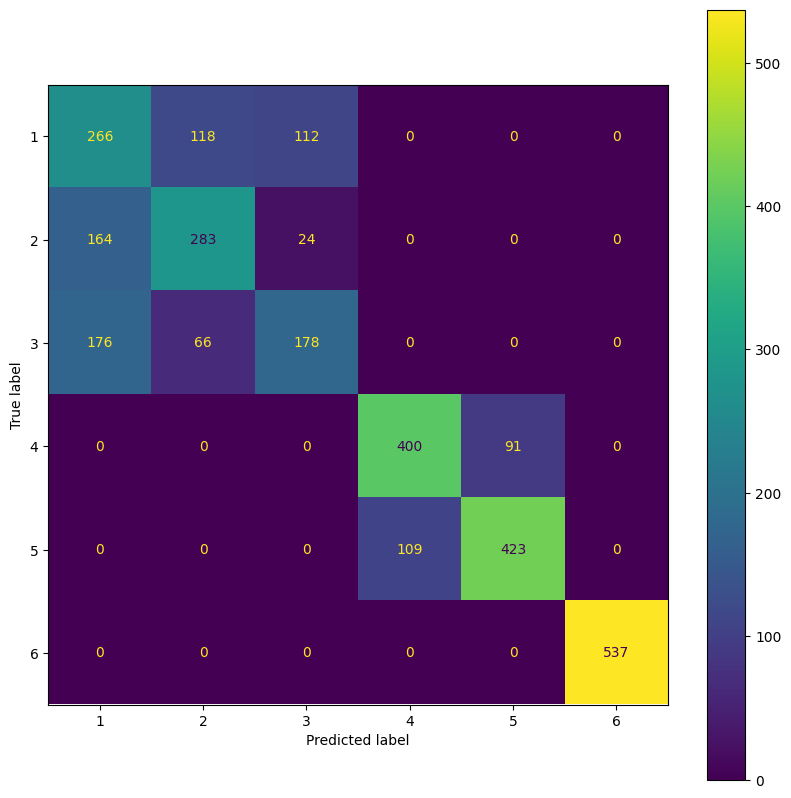

In [37]:
print(f'Acurácia: {acuracia_teste*100:.2f}')

plt.rc('figure', figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [91]:
y_bin_train = (y_train == 3).astype(int)
y_bin_test =  (y_test == 3).astype(int)

In [70]:
clf = DecisionTreeClassifier(min_samples_leaf= 20 , max_depth= 4 , random_state= 21)
clf.fit(X_train , y_bin_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=21)

In [72]:
importances = clf.feature_importances_
variaveis = X_train.columns
importance_df = pd.DataFrame({'Variaveis': variaveis, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [74]:
importance_df.head(3)

,Variaveis,Importance
9,tBodyAcc-max()-X,0.775057
159,"tBodyGyro-correlation()-Y,Z",0.051200
504,fBodyAccMag-mad(),0.036257


In [83]:
X_test2 = X_test[['tBodyAcc-max()-X' , 'tBodyGyro-correlation()-Y,Z' , 'fBodyAccMag-mad()']]

In [93]:
clf.fit(X_test2 , y_bin_test)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=21)

In [94]:
y_pred = clf.predict(X_test2)
cm = confusion_matrix(y_bin_test, y_pred, labels=clf.classes_)

Acurácia: 70.82


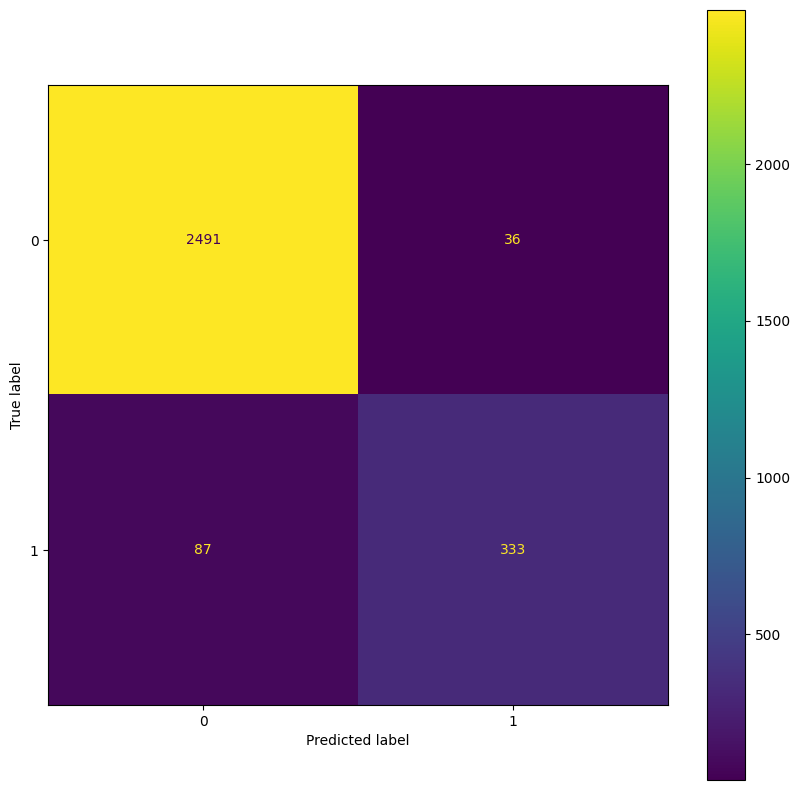

In [95]:
print(f'Acurácia: {acuracia_teste*100:.2f}')

plt.rc('figure', figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()